In [214]:
import pandas as pd
import numpy as np
import os
'''
for dirname, _, filenames in os.walk('./'):
    for file in filenames:
        print(os.path.join(dirname,file))
'''

"\nfor dirname, _, filenames in os.walk('./'):\n    for file in filenames:\n        print(os.path.join(dirname,file))\n"

In [111]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
train.isnull().sum()/train.index[-1]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198876
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771910
Embarked       0.002247
dtype: float64

In [113]:
train['Age'].fillna(train['Age'].median(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [114]:
test['Age'].fillna(train['Age'].median(), inplace = True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [115]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [116]:
name = [ i.split(',')[1].split('.')[0].strip() for i in train['Name'] ]
train['title'] = name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [117]:
train.groupby('title').count().index

Index(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'],
      dtype='object', name='title')

In [118]:
train[ ['SibSp', 'Survived'] ].groupby( 'SibSp', as_index = False ).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [119]:
train['title'] = train['title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major',
                                         'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train.groupby('title').count()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
title,,,,,,,,,,,,
Master,40,40,40,40,40,40,40,40,40,40,7,40
Miss,182,182,182,182,182,182,182,182,182,182,47,182
Mlle,2,2,2,2,2,2,2,2,2,2,2,2
Mme,1,1,1,1,1,1,1,1,1,1,1,1
Mr,517,517,517,517,517,517,517,517,517,517,93,517
Mrs,125,125,125,125,125,125,125,125,125,125,44,125
Ms,1,1,1,1,1,1,1,1,1,1,0,1
Rare,23,23,23,23,23,23,23,23,23,23,10,23


In [120]:
#print(train[ train['title'].str.contains('Mr') ]['title'])
name = [ i.split(',')[1].split('.')[0].strip() for i in test['Name'] ]
test['title'] = name
test['title'] = test['title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major',
                                         'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [121]:
train.drop(['Cabin', 'Name', 'Ticket' ],axis = 1,inplace = True)
test.drop(['Cabin', 'Name', 'Ticket'], axis = 1, inplace = True)

In [122]:
test['Fare'].fillna( test[test.Pclass==3]['Fare'].median(), inplace = True )

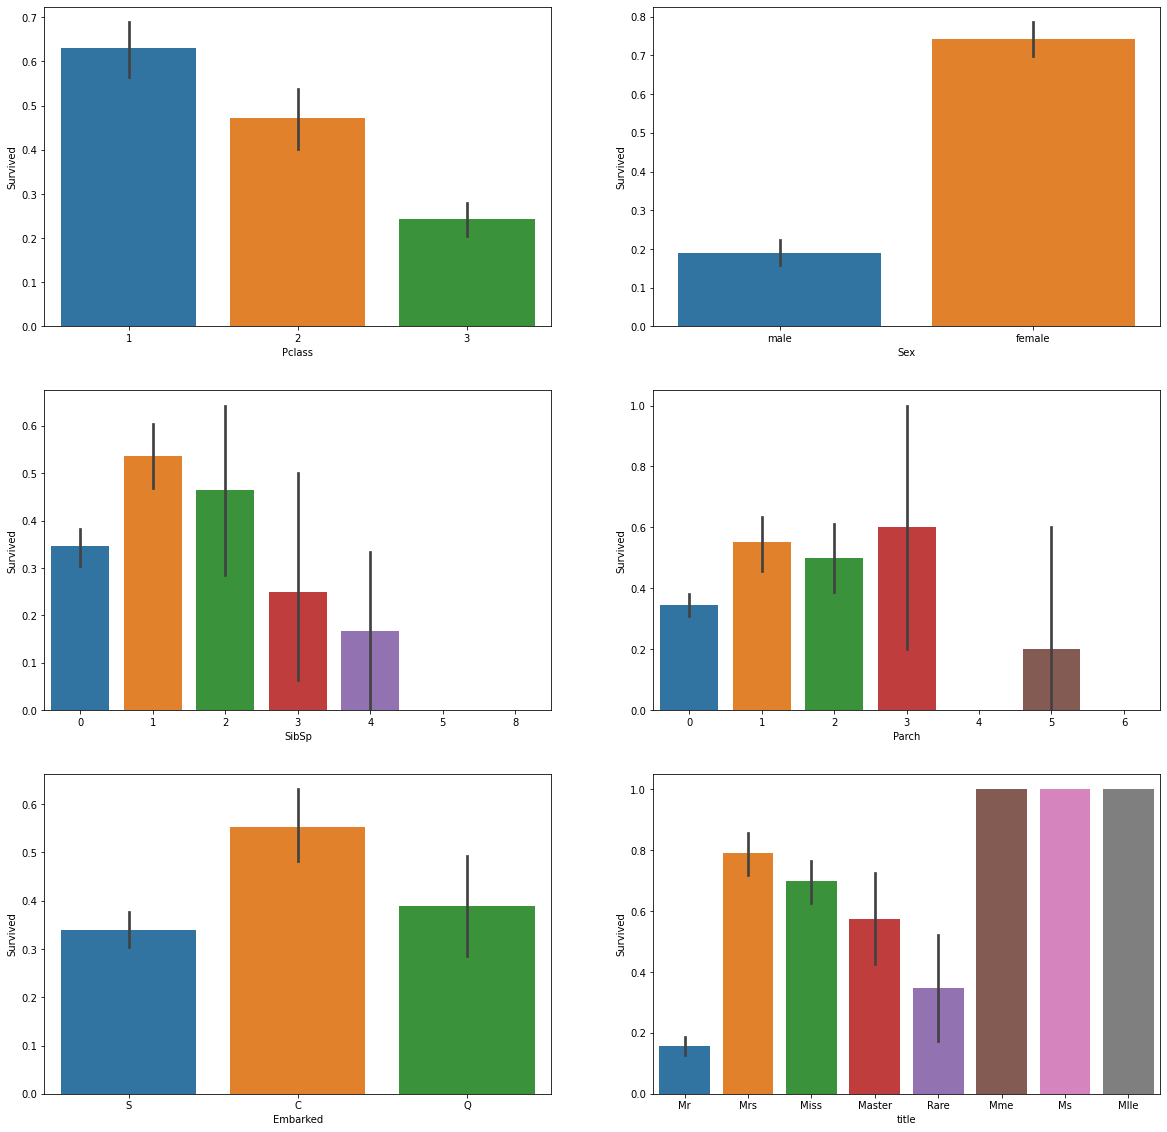

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, axes = plt.subplots( 3, 2, figsize = ( 20, 20 ) )
count = 0
for name in [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title' ]:
    #s = train[[name, 'Survived'] ].groupby(name).sum()
    #sns.barplot( x = s.index, y = s['Survived'], data = s, ax = axes[count//2][count%2] )
    sns.barplot(x = train[name], y = train.Survived, data = train, ax = axes[count//2][count%2])
    count +=1

<AxesSubplot:xlabel='Age', ylabel='Survived'>

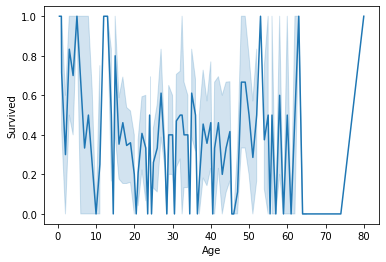

In [124]:
sns.lineplot(x = train.Age, y = train.Survived, data = train, palette = sns.color_palette('bright', 1))

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

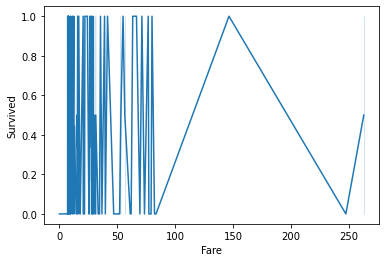

In [125]:
sns.lineplot(x = 'Fare', y = 'Survived', data = train[:200])

<AxesSubplot:>

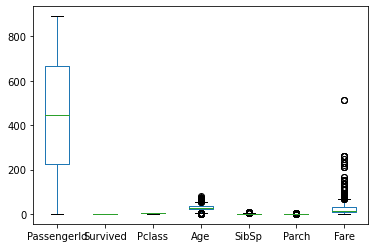

In [126]:
train.plot(kind = 'box')

<AxesSubplot:>

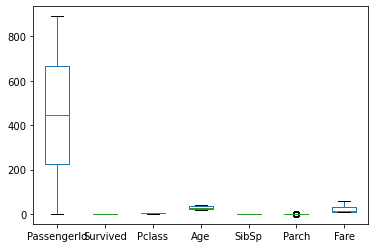

In [127]:
cols = [ 'Age', 'SibSp', 'Parch', 'Fare']
train[cols] = train[cols].clip(lower = train[cols].quantile(0.15), upper = train.quantile(0.85), axis = 1)
train.plot(kind = 'box')

<AxesSubplot:>

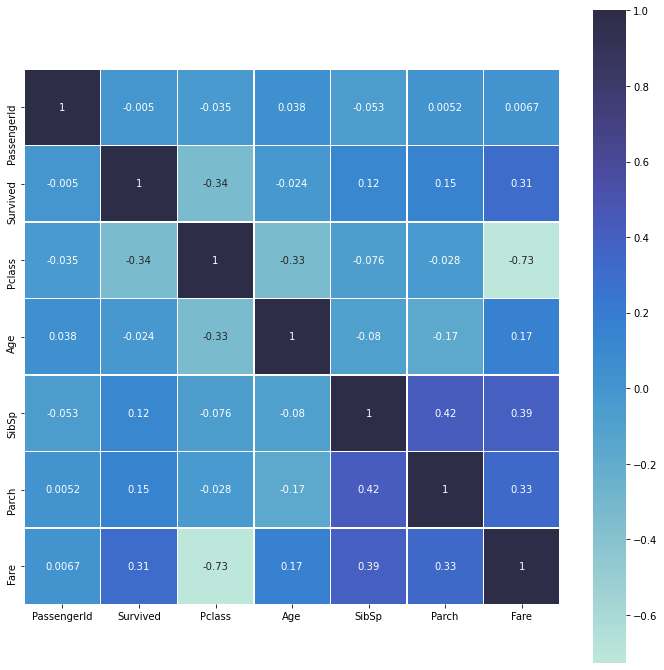

In [128]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), center = 1.4, lw = 0.5, square = True, annot = True)

In [129]:
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()
train['Embarked'] = LabelEncoder.fit_transform(train['Embarked'])
test['Embarked'] = LabelEncoder.transform(test['Embarked'])
train['Sex'] = LabelEncoder.fit_transform(train['Sex'])
test['Sex'] = LabelEncoder.transform(test['Sex'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,1,22.0,1,0,7.7500,2,Mr
1,2,1,1,0,38.0,1,0,56.4958,0,Mrs
2,3,1,3,0,26.0,0,0,7.9250,2,Miss
3,4,1,1,0,35.0,1,0,53.1000,2,Mrs
4,5,0,3,1,35.0,0,0,8.0500,2,Mr


In [133]:
for i in set(train.title.values):
    temp = []
    for j in train.title:
        if j == i:
            temp.append(1)
        else:
            temp.append(0)
    train[i] = temp
    temp = []
    for j in test.title:
        if j == i:
            temp.append(1)
        else:
            temp.append(0)
    test[i] = temp
    

In [157]:
drop_cols = ['PassengerId', 'title']
training = train.drop(drop_cols, axis = 1)
testing = test.drop(drop_cols, axis = 1)
Ytraining = train['Survived']
training.drop('Survived', axis = 1, inplace = True)

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training = scaler.fit_transform(training)
testing = scaler.transform(testing)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Master,Mr,Mrs,Mme,Miss,Rare,Mlle,Ms
0,1,0,3,1,22.0,1,0,7.7500,2,Mr,0,1,0,0,0,0,0,0
1,2,1,1,0,38.0,1,0,56.4958,0,Mrs,0,0,1,0,0,0,0,0
2,3,1,3,0,26.0,0,0,7.9250,2,Miss,0,0,0,0,1,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,2,Mrs,0,0,1,0,0,0,0,0
4,5,0,3,1,35.0,0,0,8.0500,2,Mr,0,1,0,0,0,0,0,0


In [162]:
training

array([[1.        , 1.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.41666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.58333333, ..., 0.        , 0.        ,
        0.        ]])

In [164]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(training, Ytraining, test_size = 0.2, random_state = 40)


In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

predict = []
lg = LogisticRegression()
lg_params = { 'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2'] }
lg_reg = GridSearchCV( lg, lg_params, n_jobs = -1)
lg_reg.fit(Xtrain, Ytrain)
lg_pred = lg_reg.predict(Xtest)

dt = DecisionTreeClassifier()
dt_params = {'max_depth': np.arange(3,10,2)}
dt_reg = GridSearchCV( dt, dt_params, n_jobs = -1,  )
dt_reg.fit(Xtrain, Ytrain)
dt_pred = dt_reg.predict(Xtest)

n_estimators = [10,100,500,1000,2000]
max_depth = [5,10,20]
rf = RandomForestClassifier()
rf_params = { 'n_estimators':n_estimators, 'max_depth':max_depth }
rf_reg = GridSearchCV( rf, rf_params, n_jobs = -1 )
rf_reg.fit(Xtrain, Ytrain)
rf_pred = rf_reg.predict(Xtest)

predict.append(lg_pred)
predict.append(dt_pred)
predict.append(rf_pred)

In [181]:
from sklearn.metrics import accuracy_score
model = ['LogisticRegression : ', 'DecisionTree : ', 'RandomForest : ']
for i in range(len(predict)):
    print(model[i] + str( accuracy_score( Ytest, predict[i] ) ))


LogisticRegression : 0.8212290502793296
DecisionTree : 0.8435754189944135
RandomForest : 0.8547486033519553


In [180]:
print(lg_reg.best_params_)
print(dt_reg.best_params_)
print(rf_reg.best_params_)

{'C': 1.0, 'penalty': 'l2'}
{'max_depth': 3}
{'max_depth': 5, 'n_estimators': 1000}


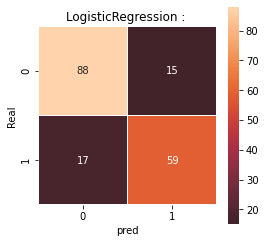

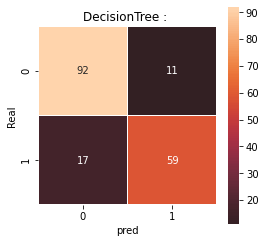

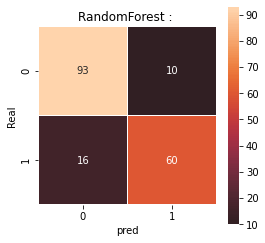

In [207]:
for i in range(len(predict)):
    cm = confusion_matrix(Ytest, predict[i])
    plt.figure(figsize = (4,4))
    plt.title(model[i])
    sns.heatmap(cm, annot = True, lw = 0.5, square = True, center = 0.5)
    plt.ylabel('Real')
    plt.xlabel('pred')

In [209]:
rf = RandomForestClassifier(max_depth =  5, n_estimators = 1000)
rf.fit(training, Ytraining)
final_pred = rf.predict(testing)


In [212]:
submission = pd.DataFrame( {'PassengerId' : test['PassengerId'], 'Survived': final_pred } )
submission.to_csv( 'new_tianic.csv', index = False )

In [213]:
ff = pd.read_csv('new_tianic.csv')
ff.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
